<h1 align='center'>Алгоритмы анализа данных</h1>

<h1 align='center'>Домашнее задание № 2</h1>

<h2 align='left'>Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск</h2>

In [1]:
import numpy as np

# <p style="background-color:lightgreen;font-family:newtimeroman;color:#662e2e;font-size:130%;text-align:center;border-radius:30px 30px;">Задача 1</p>

__1.__ Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

**Решение:**  

In [2]:
X_st = np.array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
              [ 1.        , -0.70710678, -0.56713087, -0.89625816],
              [ 1.        , -0.35355339, -0.46401617,  0.38411064],
              [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
              [ 1.        ,  0.        ,  0.97958969,  0.38411064],
              [ 1.        , -1.06066017, -0.36090146, -0.89625816],
              [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
              [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
              [ 1.        , -0.70710678, -1.08270439, -0.89625816],
              [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [5]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        if 0 in W:
            break
        else:            
            dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
            dReg = reg * (W / abs(W)) # градиент регуляризации
            W -= eta * (dQ + dReg)           

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [6]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-8)

Iter: 0, weights: [11.69737132  1.72390869  2.35644334  3.28683591], error 3257.1910500562512
Iter: 500, weights: [56.5         6.30306808 -0.35626614  6.57137514], error 24.90461887795075
Iter: 1000, weights: [56.5         6.30309349 -0.3563888   6.57147638], error 24.90461887518875
Iter: 1500, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.90461887518875
Iter: 2000, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Iter: 2500, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Iter: 3000, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Iter: 3500, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Iter: 4000, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Iter: 4500, weights: [56.5         6.30309349 -0.3563888   6.57147639], error 24.904618875188735
Final MSE: 24.904618875188735


array([56.5       ,  6.30309349, -0.3563888 ,  6.57147639])

# <p style="background-color:lightgreen;font-family:newtimeroman;color:#662e2e;font-size:130%;text-align:center;border-radius:30px 30px;">Задача 2</p>

__2*.__ Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

**Решение:**  

Применение сразу нормализации и стандартизации не имеет смысла

In [7]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [8]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [9]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [10]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [11]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

Стандартизация

In [12]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [13]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [14]:
X_st2 = X_norm.copy().astype(np.float64)
X_st2[:, 1] = standard_scale(X_st2[:, 1])
X_st2[:, 2] = standard_scale(X_st2[:, 2])
X_st2[:, 3] = standard_scale(X_st2[:, 3])

X_st2

array([[ 1.00000000e+00, -7.07106781e-01, -9.79589689e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -7.07106781e-01, -5.67130873e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01, -4.64016169e-01,
         3.84110640e-01],
       [ 1.00000000e+00,  7.07106781e-01, -7.73360281e-01,
        -8.96258160e-01],
       [ 1.00000000e+00, -1.96261557e-16,  9.79589689e-01,
         3.84110640e-01],
       [ 1.00000000e+00, -1.06066017e+00, -3.60901465e-01,
        -8.96258160e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.08270439e+00,
         1.66447944e+00],
       [ 1.00000000e+00,  2.47487373e+00,  2.11385144e+00,
         1.66447944e+00],
       [ 1.00000000e+00, -7.07106781e-01, -1.08270439e+00,
        -8.96258160e-01],
       [ 1.00000000e+00, -3.53553391e-01,  5.15573521e-02,
         3.84110640e-01]])

# <p style="background-color:lightgreen;font-family:newtimeroman;color:#662e2e;font-size:130%;text-align:center;border-radius:30px 30px;">Задача 3</p>

3*.__ Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

**Решение:**  

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
X, Y, coef = datasets.make_regression(n_samples = 10000,
                                      n_features=3,
                                      n_informative=3,
                                      n_targets=1,
                                      noise=10,
                                      coef=True,
                                      random_state=42)

display(X, Y, coef)

array([[-1.61474986,  0.09675492, -0.40611036],
       [ 0.34298297,  0.1405564 ,  1.12645776],
       [-1.74097826,  0.49534775,  1.12238994],
       ...,
       [ 0.69070089,  0.38052031, -0.7974855 ],
       [-0.59975424, -0.80838884,  0.08983412],
       [-1.26468604,  1.79614738,  1.25465604]])

array([-97.55444784,  98.77313879,  50.05488068, ...,  12.37482011,
       -98.74734064, 204.04186868])

array([43.32504238, 88.16437552, 83.18686148])

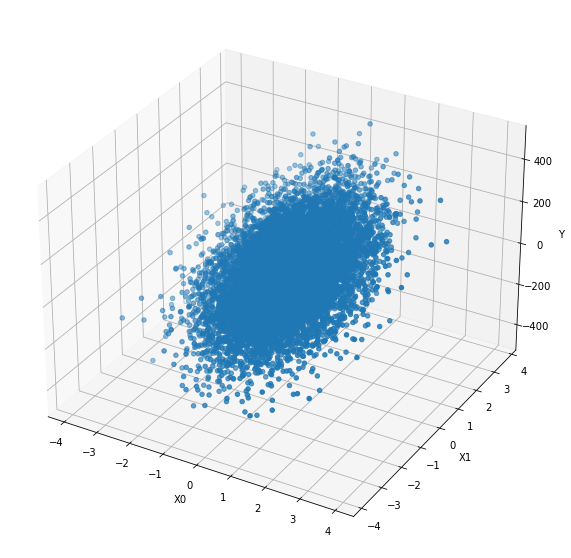

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

Отмасштабируем получившиеся признаки методом стандартизации.

In [18]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
display(means, stds)

array([ 0.0019744 ,  0.00266771, -0.0057068 ])

array([0.99288149, 0.99929597, 1.00372428])

In [19]:
X.shape[0]

10000

In [20]:
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [21]:
X

array([[-1.62831543,  0.0941535 , -0.39891787],
       [ 0.34345345,  0.13798584,  1.12796371],
       [-1.75544883,  0.49302714,  1.12391099],
       ...,
       [ 0.69366435,  0.3781188 , -0.78884083],
       [-0.60604275, -0.81162796,  0.09518643],
       [-1.27574181,  1.79474322,  1.25568632]])

In [22]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

display(means, stds)

array([-5.91970917e-17,  3.26849658e-17,  1.27009514e-17])

array([1., 1., 1.])

In [23]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Реализуем стохастический градиентный спуск

In [24]:
%%time

# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(42)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    error_sgd = mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_sgd.append(error_sgd)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error_sgd, 4)}')
        
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)


print(f'Iter {iter_num}: error - {error_sgd}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}') 

Iteration #0: W_new = [-0.03545301 -0.16342275  0.28038383], MSE = 16430.083
Iteration #100: W_new = [37.02602165 83.9311722  79.28224811], MSE = 170.3196
Iteration #200: W_new = [43.45732811 88.60000953 84.27127963], MSE = 100.1544
Iteration #300: W_new = [43.39700289 86.75202983 84.17006817], MSE = 101.7426
Iteration #400: W_new = [44.21085048 89.99652286 84.88965719], MSE = 105.7511
Iteration #500: W_new = [42.27544552 86.07291232 85.65298468], MSE = 108.9019
Iteration #600: W_new = [42.24871902 89.41792386 83.47294268], MSE = 101.5267
Iteration #700: W_new = [44.66554558 87.11122633 83.15631521], MSE = 103.0164
Iteration #800: W_new = [40.80003069 87.73328544 84.36672499], MSE = 105.3698
Iteration #900: W_new = [41.96242883 88.22940052 83.91506336], MSE = 100.6513
Iter 1000: error - 105.63623790745488, weights: [44.95648442 86.47708756 83.33990297]
В случае использования стохастического градиентного спуска ошибка составляет 105.6362
CPU times: user 2.71 s, sys: 58.9 ms, total: 2.77

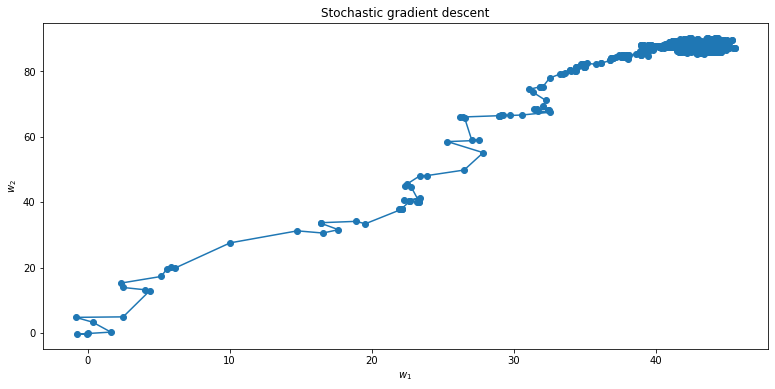

In [25]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt. figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

Реализуем градиентный спуск

In [26]:
%%time

# возьмем нулевые начальные веса
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_gd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1000

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error_gd= mserror(X, new_w, Y)
    
    w_list.append(new_w.copy())
    errors_gd.append(error_gd)
    
    # print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error_gd, 4)}')
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

Iteration #0: W_new = [0.8342673  1.74917916 1.63775915], MSE = 15806.9032
Iteration #10: W_new = [ 8.33807509 17.44107677 16.34892707], MSE = 10651.6321
Iteration #20: W_new = [14.50904352 30.28284685 28.41698826], MSE = 7188.4017
Iteration #30: W_new = [19.58384387 40.79219381 38.31682009], MSE = 4861.833
Iteration #40: W_new = [23.75713474 49.39277871 46.43798063], MSE = 3298.8476
Iteration #50: W_new = [27.1890176  56.43130379 53.10003756], MSE = 2248.8253
Iteration #60: W_new = [30.01116965 62.1914931  58.56514308], MSE = 1543.4071
Iteration #70: W_new = [32.33188865 66.9055332  63.04834947], MSE = 1069.4932
Iteration #80: W_new = [34.24024269 70.76343535 66.72607136], MSE = 751.1053
Iteration #90: W_new = [35.80948362 73.92069696 69.74302759], MSE = 537.2016
Iteration #100: W_new = [37.09985473 76.50457108 72.21793587], MSE = 393.4925
Iteration #110: W_new = [38.16090025 78.61919705 74.2481843 ], MSE = 296.9419
Iteration #120: W_new = [39.03336484 80.34979903 75.91366359], MSE = 

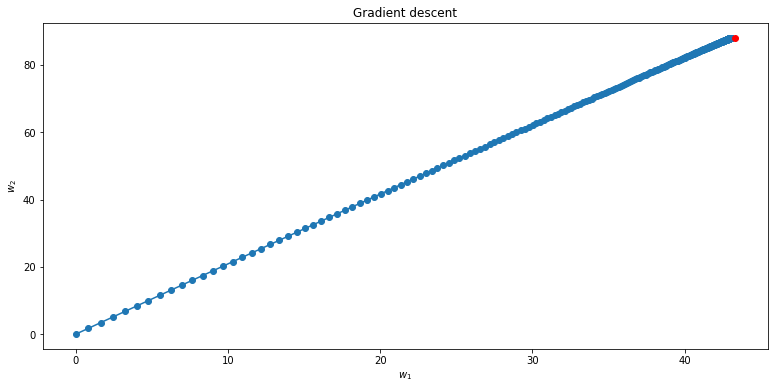

In [27]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

(0.0, 200.0)

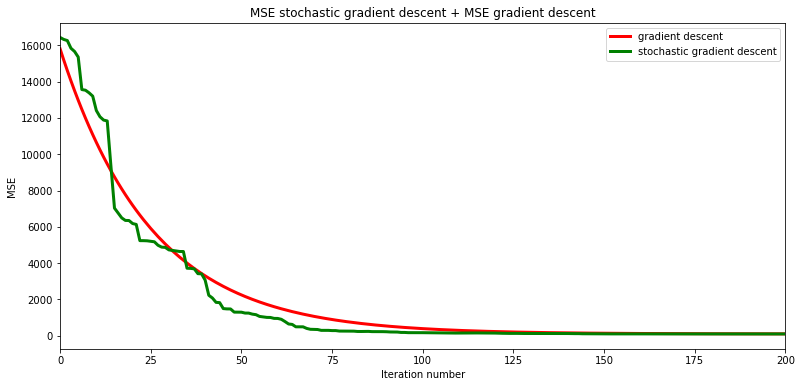

In [28]:
# Объединение двух графиков ошибки

plt.figure(figsize=(13, 6))
plt.plot(range(len(errors_gd)), errors_gd, label='gradient descent', lw=3, color='r')
plt.plot(range(len(errors_sgd)), errors_sgd, label='stochastic gradient descent', lw=3, color='g')
plt.title('MSE stochastic gradient descent + MSE gradient descent')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.xlim((0, 200))

__Вывод:__
На сгенерированном датасете, стахостический градиентный спуск  (СГД) справился бысрее градиентного спуска(ГД). MSE получились практически одинаковыми. Но начиная примерно с 40й итерации точнее СГД.